In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
colnames=['tweets', 'created_at', 'id','rt','lang','urls'] 
df = pd.read_csv('output_relevant_nocord.csv', names=colnames, header=None)
print(df.shape[0])
df.loc[df.id==256685411366227968]

70714


,tweets,created_at,id,rt,lang,urls
3902,The EU won the 2012 #Nobel Peace Prize.,Fri Oct 12 09:19:05 +0000 2012,256685411366227968,False,en,None


In [3]:
df.shape[0]

70714

In [4]:
unique_ids = df.id.unique()

In [5]:
df2_list = []
for temp_id in unique_ids:
    temp = df.loc[df.id==temp_id].copy()
    df2_list.append(temp.iloc[0])

In [6]:
len(df2_list)

69539

In [7]:
columns = df.columns.tolist()
df2 = pd.DataFrame(columns=columns)
df2 = df2.append(df2_list,ignore_index=True)

In [8]:
df = df2.copy()

Text(0.5, 1.0, 'Tweets 2012')

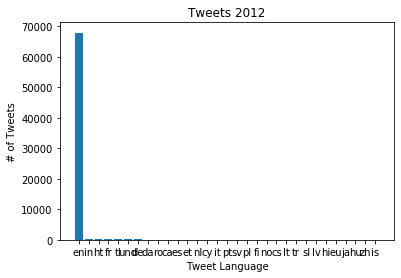

In [9]:
import matplotlib.pyplot as plt
# plots number of tweets in each language
counts = df['lang'].value_counts()
plt.bar(counts.index, counts, align='center', alpha=1)
plt.xlabel('Tweet Language')
plt.ylabel('# of Tweets')
plt.title('Tweets 2012')


In [10]:
print("Old df shape:",df.shape[0])
df = df.loc[df["lang"]=='en']
print("New df shape:",df.shape[0])

Old df shape: 69539
New df shape: 67864


In [11]:
df['Event'] = np.empty((len(df), 0)).tolist()

In [12]:
colnames_label = ['event','id']
df_label = pd.read_csv("relevant_tweets.tsv",sep='\t',names=colnames_label,header=None)

In [13]:
df_label.loc[df_label['id']==256685411366227968]

,event,id
10744,2,256685411366227968
10745,2,256685411366227968
10746,2,256685411366227968
10747,2,256685411366227968


In [14]:
sum = 10000
count = 0 
for i in range(len(df)):
    if(i==sum):
        print(i)
        sum+=10000
    temp_id = df.id.iloc[i]
    event_list = df_label.loc[df_label.id==temp_id]['event']
    for j in range(len(event_list)):
        df.Event.iloc[i].append(event_list.iloc[j])

10000
20000
30000
40000
50000
60000


In [15]:
df

,tweets,created_at,id,rt,lang,urls,Event
0,News: Chinese author Mo Yan wins Nobel http://...,Thu Oct 11 11:08:32 +0000 2012,256350567369175040,False,en,http://bbc.in/RbTlMC,[0]
1,CCTV invite hints at Nobel literature prize fo...,Thu Oct 11 10:51:28 +0000 2012,256346272506712064,False,en,http://bit.ly/RhMRvS,"[0, 0]"
2,Mo Yan wins 2012 Nobel Prize for Literature. G...,Thu Oct 11 11:11:22 +0000 2012,256351280652488704,False,en,http://bit.ly/SNAqLI,"[0, 0]"
3,#Nobel for #literature to Mo Yan.,Thu Oct 11 11:16:26 +0000 2012,256352555431510018,False,en,None,[0]
4,Chinese author Mo Yan wins Nobel http://t.co/g...,Thu Oct 11 11:12:31 +0000 2012,256351569753276416,False,en,http://www.bbc.co.uk/news/entertainment-arts-1...,"[0, 0]"
...,...,...,...,...,...,...,...
69534,Looks like the yankees are winning the world s...,Sat Oct 13 04:47:50 +0000 2012,256979537009713152,False,en,None,"[505, 505]"
69535,Destined to win the World Series again #12in12,Sat Oct 13 04:34:53 +0000 2012,256976277809008640,False,en,None,"[505, 505]"
69536,I see another world series this year,Sat Oct 13 04:37:33 +0000 2012,256976949229002752,False,en,None,"[505, 505]"
69537,Guess I gotta root for the Tigers to win the W...,Sat Oct 13 04:33:18 +0000 2012,256975879572426752,False,en,None,"[505, 505]"


In [16]:
# df['Event'] = np.array([list(set(temp)) for temp in df['Event']])
df['count_event'] = np.array([len(temp) for temp in df['Event']])

In [17]:
df.loc[df.count_event==4]

,tweets,created_at,id,rt,lang,urls,Event,count_event
3800,The EU won the 2012 #Nobel Peace Prize.,Fri Oct 12 09:19:05 +0000 2012,256685411366227968,False,en,None,"[2, 2, 2, 2]",4
19936,Frankenstorm Hurricane Sandy costs the United ...,Wed Oct 31 21:43:25 +0000 2012,263758098349555712,False,en,http://bit.ly/SfsRuw,"[16, 43, 69, 69]",4


In [18]:
columns = df.columns.tolist()

In [19]:
df2 = pd.DataFrame(columns=columns)

In [20]:
count=10000
list_rows = []
for index,row in df.iterrows():
    if(count<index):
        print(count)
        count+=10000
    list_event = row['Event']
    for event in list_event:
        temp_row = row.copy()
        temp_row['Event'] = event
        list_rows.append(temp_row)

10000
20000
30000
40000
50000
60000


In [21]:
df2 = df2.append(list_rows,ignore_index=True)

In [22]:
df2.loc[df2['id']==265966617589084160]

,tweets,created_at,id,rt,lang,urls,Event,count_event
78108,"Bombings rock Damascus, brother of parliament ...",Tue Nov 06 23:59:17 +0000 2012,265966617589084160,False,en,http://yhoo.it/SR6RXN,197,2
78109,"Bombings rock Damascus, brother of parliament ...",Tue Nov 06 23:59:17 +0000 2012,265966617589084160,False,en,http://yhoo.it/SR6RXN,332,2


In [23]:
df.loc[df['id']==265966617589084160]

,tweets,created_at,id,rt,lang,urls,Event,count_event
47181,"Bombings rock Damascus, brother of parliament ...",Tue Nov 06 23:59:17 +0000 2012,265966617589084160,False,en,http://yhoo.it/SR6RXN,"[197, 332]",2


In [24]:
import timestamp_graphs as tg
df2 = df2.reset_index(drop=True)
df2 = tg.createTimestamps(df2)

In [25]:
df2.columns

Index(['tweets', 'created_at', 'id', 'rt', 'lang', 'urls', 'Event',
       'count_event', 'date', 'time', 'Datetime', 'DateHour',
       'Date_Ten_Minutes'],
      dtype='object')

In [26]:
df3 = df2.copy()

In [27]:
events = df2.groupby(['Event']).count().index.tolist()
for event in events:
    dfchange = df2.loc[df2['Event']==event]
    dates = dfchange.groupby(['DateHour']).count().index.tolist()
    for date in dates:
        indexes = dfchange.loc[dfchange['DateHour']==date].index.tolist()
        if(len(indexes)<5):
            df2 = df2.drop(indexes)

In [28]:
df4 = df3.copy()

In [29]:
temp = df2.groupby(['Event']).count()

In [30]:
final_events = temp.loc[temp.id>14].index.tolist()

In [31]:
final_df = pd.DataFrame()
for event in final_events:
    dfchange = df3.loc[df3['Event']==event]
    final_df = pd.concat([final_df,dfchange])

In [32]:
final_df.shape[0]

97754

In [33]:
final_df.columns

Index(['tweets', 'created_at', 'id', 'rt', 'lang', 'urls', 'Event',
       'count_event', 'date', 'time', 'Datetime', 'DateHour',
       'Date_Ten_Minutes'],
      dtype='object')

In [34]:
df = final_df[['tweets','created_at','id','rt','lang','urls','Event']]
df

,tweets,created_at,id,rt,lang,urls,Event
0,News: Chinese author Mo Yan wins Nobel http://...,Thu Oct 11 11:08:32 +0000 2012,256350567369175040,False,en,http://bbc.in/RbTlMC,0
1,CCTV invite hints at Nobel literature prize fo...,Thu Oct 11 10:51:28 +0000 2012,256346272506712064,False,en,http://bit.ly/RhMRvS,0
2,CCTV invite hints at Nobel literature prize fo...,Thu Oct 11 10:51:28 +0000 2012,256346272506712064,False,en,http://bit.ly/RhMRvS,0
3,Mo Yan wins 2012 Nobel Prize for Literature. G...,Thu Oct 11 11:11:22 +0000 2012,256351280652488704,False,en,http://bit.ly/SNAqLI,0
4,Mo Yan wins 2012 Nobel Prize for Literature. G...,Thu Oct 11 11:11:22 +0000 2012,256351280652488704,False,en,http://bit.ly/SNAqLI,0
...,...,...,...,...,...,...,...
101252,I see another world series this year,Sat Oct 13 04:37:33 +0000 2012,256976949229002752,False,en,None,505
101253,Guess I gotta root for the Tigers to win the W...,Sat Oct 13 04:33:18 +0000 2012,256975879572426752,False,en,None,505
101254,Guess I gotta root for the Tigers to win the W...,Sat Oct 13 04:33:18 +0000 2012,256975879572426752,False,en,None,505
101255,"Cubs last World Series win, they were keeping ...",Sat Oct 13 04:53:01 +0000 2012,256980841446645760,False,en,None,505


In [35]:
# df = df.reset_index(drop=True)
# df.to_csv(r'clean_relevant_tweets.csv',index=False)